# Churn Project

<img src="https://www.madlytics.com/wp-content/uploads/2017/08/Customer-churn-1.png" />


In [467]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('display.max_columns', None)

In [468]:
#import Dataset
churn=pd.read_csv('churn.csv')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [469]:
#Check how many records in file
churn.shape

(7043, 21)

In [470]:
#Check types
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#We have 7043 examples and 21 columns (1, customerid,19 features\variables and one label).   
#having look at data types we can see that total charge is object. need to be numeric

# Describe DATA

In [471]:
churn.dtypes
#describe numeric variables
churn.describe()
#describe categorical variable
churn['gender'].value_counts()
churn['gender'].value_counts(normalize=True)
churn['SeniorCitizen'].value_counts()
churn['SeniorCitizen'].value_counts(normalize=True)
churn['Partner'].value_counts()
churn['Partner'].value_counts(normalize=True)
churn['Dependents'].value_counts()
churn['Dependents'].value_counts(normalize=True)
churn['PaperlessBilling'].value_counts()
churn['PaperlessBilling'].value_counts(normalize=True)
churn['PhoneService'].value_counts()
churn['PhoneService'].value_counts(normalize=True)
churn['MultipleLines'].value_counts()
churn['MultipleLines'].value_counts(normalize=True)
churn['InternetService'].value_counts()
churn['InternetService'].value_counts(normalize=True)
churn['OnlineSecurity'].value_counts()
churn['OnlineSecurity'].value_counts(normalize=True)
churn['OnlineBackup'].value_counts()
churn['OnlineBackup'].value_counts(normalize=True)
churn['DeviceProtection'].value_counts()
churn['DeviceProtection'].value_counts(normalize=True)
churn['TechSupport'].value_counts()
churn['TechSupport'].value_counts(normalize=True)
churn['StreamingTV'].value_counts()
churn['StreamingTV'].value_counts(normalize=True)
churn['StreamingMovies'].value_counts()
churn['StreamingMovies'].value_counts(normalize=True)
churn['Contract'].value_counts()
churn['Contract'].value_counts(normalize=True)
churn['PaperlessBilling'].value_counts()
churn['PaperlessBilling'].value_counts(normalize=True)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Male      3555
Female    3488
Name: gender, dtype: int64

Male      0.504756
Female    0.495244
Name: gender, dtype: float64

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

No     3641
Yes    3402
Name: Partner, dtype: int64

No     0.516967
Yes    0.483033
Name: Partner, dtype: float64

No     4933
Yes    2110
Name: Dependents, dtype: int64

No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

Yes    0.592219
No     0.407781
Name: PaperlessBilling, dtype: float64

Yes    6361
No      682
Name: PhoneService, dtype: int64

Yes    0.903166
No     0.096834
Name: PhoneService, dtype: float64

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: MultipleLines, dtype: float64

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: float64

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name: OnlineSecurity, dtype: float64

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

No                     0.438450
Yes                    0.344881
No internet service    0.216669
Name: OnlineBackup, dtype: float64

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

No                     0.439443
Yes                    0.343888
No internet service    0.216669
Name: DeviceProtection, dtype: float64

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

No                     0.493114
Yes                    0.290217
No internet service    0.216669
Name: TechSupport, dtype: float64

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

No                     0.398978
Yes                    0.384353
No internet service    0.216669
Name: StreamingTV, dtype: float64

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

No                     0.395428
Yes                    0.387903
No internet service    0.216669
Name: StreamingMovies, dtype: float64

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: Contract, dtype: float64

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

Yes    0.592219
No     0.407781
Name: PaperlessBilling, dtype: float64

In [472]:
#label to numeric
churn.Churn = (churn.Churn=='Yes').astype('int')
churned=sum(churn['Churn'])
customers=len(churn)
churnrate=churn['Churn'].mean()
print('The number of customers that churned is :%d out of %d customers , and the Churn Rate is: (%f%%)' % (churned,customers,churnrate*100))

The number of customers that churned is :1869 out of 7043 customers , and the Churn Rate is: (26.536987%)


# Data Cleaning

1.Rename columns to lower letters   
2. check missing values   
3. fill mean values to missing total charges   
4. convert 'yes/no' features to numeric   
5. inteligent combine of categoris in categorial variables  
6. create new features  
7. drop uneccesary features  


In [473]:
#rename columns to lower case
churn=churn.rename(columns=str.lower)


#change total chatges to numeric

In [474]:
churn['totalcharges'] = pd.to_numeric(churn['totalcharges'], errors='coerce')
churn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [475]:
#Check nulls
churn.isna().sum()
# 11 missing values in totalcharges
# fill mean values to missing total charges
churn.totalcharges = churn.totalcharges.fillna(churn.totalcharges.mean()) 
#check missing values after imutation
churn.isnull().sum()


customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [476]:

#yes no feature to numeric
churn.female=None
churn['female'] = (churn.gender=='Female').astype('int')
churn['partner'] = (churn['partner']=='Yes').astype('int')
churn['dependents'] = (churn.dependents=='Yes').astype('int')
churn['phoneservice'] = (churn.phoneservice=='Yes').astype('int')
churn['paperlessbilling']=(churn.paperlessbilling=='Yes').astype('int')

In [477]:
churn.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner               int32
dependents            int32
tenure                int64
phoneservice          int32
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling      int32
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
female                int32
dtype: object

In [478]:
#Convert all rows of Yes/No to 1/0, assume 'No phone service'=No
churn['multiplelines']=churn['multiplelines'].replace(to_replace=['Yes','No','No phone service'],value=[1,0,0])

In [479]:
#add new column as flag "has internet service"
churn["has_internetservice"]=churn["internetservice"].replace(to_replace=['No','DSL','Fiber optic'],value=[0,1,1])
churn['has_internetservice'].value_counts()
churn['has_internetservice'].value_counts(normalize=True)

1    5517
0    1526
Name: has_internetservice, dtype: int64

1    0.783331
0    0.216669
Name: has_internetservice, dtype: float64

In [480]:
#Convert all rows of Yes/No to 1/0, assume 'No internet service' =No
churn['onlinesecurity']=churn['onlinesecurity'].replace(to_replace=['Yes','No','No internet service'],value=[1,0,0])

In [481]:
#Convert all rows of Yes/No to 1/0, assume 'No internet service' =No
churn['onlinebackup']=churn['onlinebackup'].replace(to_replace=['Yes','No','No internet service'],value=[1,0,0])

In [482]:
#Convert all rows of Yes/No to 1/0, assume 'No internet service' =No
churn['deviceprotection']=churn['deviceprotection'].replace(to_replace=['Yes','No','No internet service'],value=[1,0,0])

In [483]:
#Convert all rows of Yes/No to 1/0, assume 'No internet service' =No
churn['techsupport']=churn['techsupport'].replace(to_replace=['Yes','No','No internet service'],value=[1,0,0])

In [484]:
#Convert all rows of Yes/No to 1/0, assume 'No internet service' =No
churn['streamingtv']=churn['streamingtv'].replace(to_replace=['Yes','No','No internet service'],value=[1,0,0])

In [485]:
#Convert all rows of Yes/No to 1/0, assume 'No internet service' =No
churn['streamingmovies']=churn['streamingmovies'].replace(to_replace=['Yes','No','No internet service'],value=[1,0,0])

In [486]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customerid           7043 non-null   object 
 1   gender               7043 non-null   object 
 2   seniorcitizen        7043 non-null   int64  
 3   partner              7043 non-null   int32  
 4   dependents           7043 non-null   int32  
 5   tenure               7043 non-null   int64  
 6   phoneservice         7043 non-null   int32  
 7   multiplelines        7043 non-null   int64  
 8   internetservice      7043 non-null   object 
 9   onlinesecurity       7043 non-null   int64  
 10  onlinebackup         7043 non-null   int64  
 11  deviceprotection     7043 non-null   int64  
 12  techsupport          7043 non-null   int64  
 13  streamingtv          7043 non-null   int64  
 14  streamingmovies      7043 non-null   int64  
 15  contract             7043 non-null   o

In [487]:
churn.describe()
#split monthlycharges to 3 categories: 0-35.5-low , 35.5-89-medium , 89+-high, according to 25, 50, 75 precentiles
churn.loc[(churn['monthlycharges'] < 35.5),'monthlycharges_cat'] = '1-low'
churn.loc[(churn['monthlycharges'] >= 35.5) & (churn['monthlycharges'] < 89),'monthlycharges_cat'] = '2-medium'
churn.loc[(churn['monthlycharges'] >= 89),'monthlycharges_cat'] = '3-high'
churn['monthlycharges_cat'].value_counts().sort_values()
churn['monthlycharges_cat'].value_counts(normalize=True).sort_values()


,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,monthlycharges,totalcharges,churn,female,has_internetservice
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.300441,0.265370,0.495244,0.783331
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2265.000258,0.441561,0.500013,0.412004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,402.225000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1400.550000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000


1-low       1759
3-high      1895
2-medium    3389
Name: monthlycharges_cat, dtype: int64

1-low       0.249752
3-high      0.269061
2-medium    0.481187
Name: monthlycharges_cat, dtype: float64

In [488]:
# add new column for total number of services
churn['num_of_services']=churn.phoneservice+churn.multiplelines+\
churn.has_internetservice+churn.onlinesecurity+churn.onlinebackup+\
churn.deviceprotection+churn.techsupport+churn.streamingtv+\
churn.streamingmovies
churn['num_of_services'].value_counts()
churn['num_of_services'].value_counts(normalize=True)

1    1264
4     965
5     922
6     908
2     859
3     846
7     676
8     395
9     208
Name: num_of_services, dtype: int64

1    0.179469
4    0.137015
5    0.130910
6    0.128922
2    0.121965
3    0.120119
7    0.095982
8    0.056084
9    0.029533
Name: num_of_services, dtype: float64

Drop unnecessary columns 

In [489]:
# totalcharges is a function of tenure and monthly charges 
churn1 = churn.drop(['totalcharges','gender'], axis=1)
churn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customerid           7043 non-null   object 
 1   seniorcitizen        7043 non-null   int64  
 2   partner              7043 non-null   int32  
 3   dependents           7043 non-null   int32  
 4   tenure               7043 non-null   int64  
 5   phoneservice         7043 non-null   int32  
 6   multiplelines        7043 non-null   int64  
 7   internetservice      7043 non-null   object 
 8   onlinesecurity       7043 non-null   int64  
 9   onlinebackup         7043 non-null   int64  
 10  deviceprotection     7043 non-null   int64  
 11  techsupport          7043 non-null   int64  
 12  streamingtv          7043 non-null   int64  
 13  streamingmovies      7043 non-null   int64  
 14  contract             7043 non-null   object 
 15  paperlessbilling     7043 non-null   i

# Relation to Churn

In [490]:
#check whether customer id has some meaning
# Check CustomerID first part
churn1['cust1']=churn1.customerid.str[0:4]
cust1=churn1['cust1'].value_counts()
cust1

2027    5
3097    5
3096    5
1866    5
0516    5
       ..
9081    1
3133    1
8931    1
0022    1
6840    1
Name: cust1, Length: 5084, dtype: int64

In [491]:
#Check customerID second part
churn1['cust2']=churn1.customerid.str[6:]
cust2=churn1['cust2'].value_counts()
cust2

XKFY    2
LDGW    2
SXOE    2
UPYD    2
THFQ    2
       ..
KVSZ    1
NWCK    1
CPQJ    1
VYXX    1
JIEK    1
Name: cust2, Length: 6988, dtype: int64

In [492]:
#check if there is correlation between customerID and churn
churn1.groupby('cust1').agg({'churn':['count','sum','mean']}).sort_values('cust1')
churn1.groupby('cust2').agg({'cust2':['count'],'churn':['count','sum','mean']})

churn              
      count sum      mean
cust1                    
0002      1   0  0.000000
0003      1   0  0.000000
0004      1   1  1.000000
0011      1   1  1.000000
0013      3   1  0.333333
...     ...  ..       ...
9986      1   1  1.000000
9987      1   0  0.000000
9992      2   1  0.500000
9993      1   0  0.000000
9995      1   0  0.000000

[5084 rows x 3 columns]

cust2 churn         
      count count sum mean
cust2                     
AACC      1     1   0  0.0
AAGJ      1     1   0  0.0
AAHE      1     1   1  1.0
AAIX      1     1   0  0.0
AAPL      1     1   0  0.0
...     ...   ...  ..  ...
ZZPJ      1     1   0  0.0
ZZQI      1     1   0  0.0
ZZQS      1     1   1  1.0
ZZYM      1     1   0  0.0
ZZZD      1     1   0  0.0

[6988 rows x 4 columns]

It seems that there is no correlation between the customer ID and churn

In [493]:
churn1 = churn1.drop(['customerid','cust1','cust2'], axis=1)


In [494]:
churn1.groupby("monthlycharges_cat")["churn"].mean()

monthlycharges_cat
1-low       0.112564
2-medium    0.307760
3-high      0.331398
Name: churn, dtype: float64

<AxesSubplot:xlabel='female'>

Text(0.5, 0, 'Female')

Text(0, 0.5, 'Churn Propostions')

Text(0.5, 1.0, 'Churn Propotion by Female')

<Figure size 2160x864 with 0 Axes>

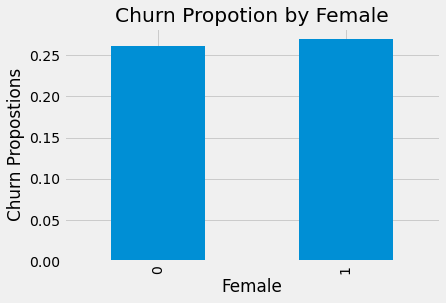

<Figure size 2160x864 with 0 Axes>

In [495]:
#Check distribution-gender
churn_by_gender = churn1.groupby('female').churn.mean()
churn_by_gender.plot(kind='bar')
plt.xlabel('Female') 
plt.ylabel('Churn Propostions') 
plt.title("Churn Propotion by Female")


plt.figure(figsize=(30,12))


fig = plt.gcf() 
plt.show() 

In [496]:
#Check distribution-seniorcitizen
churn1.groupby('seniorcitizen').agg({'churn':['count','sum','mean']})

churn                
              count   sum      mean
seniorcitizen                      
0              5901  1393  0.236062
1              1142   476  0.416813

It seems that seniorcitizen are more likely to churn

In [497]:
#Check distribution-partner
churn1.groupby('partner').agg({'churn':['count','sum','mean']})

churn                
        count   sum      mean
partner                      
0        3641  1200  0.329580
1        3402   669  0.196649

In [498]:
#Check distribution-dependents
churn1.groupby('dependents').agg({'churn':['count','sum','mean']})

churn                
           count   sum      mean
dependents                      
0           4933  1543  0.312791
1           2110   326  0.154502

Customers who have partners or dependants less churn

tenure
0     0.000000
1     0.619902
2     0.516807
3     0.470000
4     0.471591
        ...   
68    0.090000
69    0.084211
70    0.092437
71    0.035294
72    0.016575
Name: churn, Length: 73, dtype: float64

<AxesSubplot:xlabel='tenure'>

Text(0.5, 0, 'Tenure (Months)')

Text(0, 0.5, 'Churn Propostions')

Text(2, 0.55, 'Maximum churn 62%')

Text(0.5, 1.0, 'Churn Propotion by Tenure')

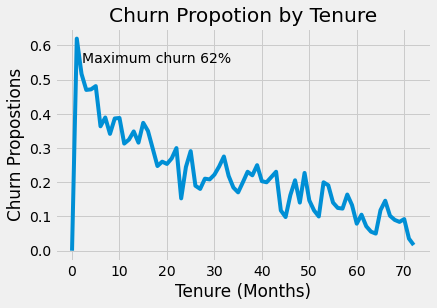

In [499]:
#Check distribution- tenure
churn_by_tenure = churn1.groupby('tenure').churn.mean()
#churn_by_tenure.plot(kind="hist")
churn_by_tenure_t=churn_by_tenure.T
churn_by_tenure_t
churn_by_tenure_t.plot()
plt.xlabel('Tenure (Months)') 
plt.ylabel('Churn Propostions') 
plt.text(2, 0.55, 'Maximum churn 62%')  

plt.title("Churn Propotion by Tenure")
#plt.locator_params(axis='x', nbins=3)

plt.show() 

In [500]:
#Check distribution- phoneservice
churn1.groupby('phoneservice').agg({'churn':['count','sum','mean']})

churn                
             count   sum      mean
phoneservice                      
0              682   170  0.249267
1             6361  1699  0.267096

It looks like we have similar churn among customer with/without phone services

In [501]:
#Check distribution- multiplelines
churn1.groupby('multiplelines').agg({'churn':['count','sum','mean']})

churn                
              count   sum      mean
multiplelines                      
0              4072  1019  0.250246
1              2971   850  0.286099

It looks like we have similar churn among customer with/without phone services

How are the customers who stayed distributed by internetservice?

In [502]:
#Check distribution- internert service
churn1.groupby('internetservice').agg({'churn':['count','sum','mean']})
df1=churn1.groupby(['internetservice','tenure']).agg (churn_proportion= ('churn', 'mean'))
df1


churn                
                count   sum      mean
internetservice                      
DSL              2421   459  0.189591
Fiber optic      3096  1297  0.418928
No               1526   113  0.074050

churn_proportion
internetservice tenure                  
DSL             0               0.000000
                1               0.561321
                2               0.524390
                3               0.450704
                4               0.409836
...                                  ...
No              68              0.000000
                69              0.000000
                70              0.000000
                71              0.000000
                72              0.000000

[218 rows x 1 columns]

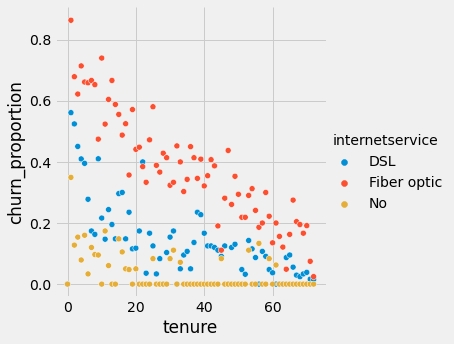

In [503]:
sns.relplot(
    data=df1,
    x="tenure", y="churn_proportion",
    hue="internetservice")

In [504]:
df1=churn1.groupby(['internetservice','monthlycharges_cat']).agg (churn_proportion= ('churn', 'mean'))
df1

churn_proportion
internetservice monthlycharges_cat                  
DSL             1-low                       0.364807
                2-medium                    0.176026
                3-high                      0.014493
Fiber optic     2-medium                    0.527559
                3-high                      0.343373
No              1-low                       0.074050

In [505]:
#Check distribution- onlinesecurity
churn1.groupby('onlinesecurity').agg({'churn':['count','sum','mean']})

churn                
               count   sum      mean
onlinesecurity                      
0               5024  1574  0.313296
1               2019   295  0.146112

People who use onlinesecurity churn less

In [506]:
#Check distribution- onlinebackup
churn1.groupby('onlinebackup').agg({'churn':['count','sum','mean']})

churn                
             count   sum      mean
onlinebackup                      
0             4614  1346  0.291721
1             2429   523  0.215315

In [507]:
#Check distribution- deviceprotection
churn1.groupby('deviceprotection').agg({'churn':['count','sum','mean']})

churn                
                 count   sum      mean
deviceprotection                      
0                 4621  1324  0.286518
1                 2422   545  0.225021

It seems deviceprotection doesn't make a difference on churn - the mean is simillar to the general average- 26%

In [508]:
##Check distribution- techsupport
churn1.groupby('techsupport').agg({'churn':['count','sum','mean']})

churn                
            count   sum      mean
techsupport                      
0            4999  1559  0.311862
1            2044   310  0.151663

the percentage of customers who dont get support is:  70.97827630271192


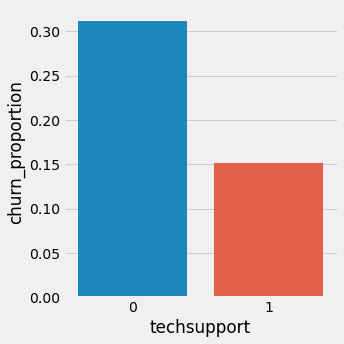

In [509]:
x=churn1.loc[churn.techsupport==0]
p=len(x)/len(churn)*100
print('the percentage of customers who dont get support is: ' , p )
df2=churn1.groupby(['techsupport']).agg (churn_proportion= ('churn', 'mean'))
df2.reset_index(inplace=True)
sns.catplot(data=df2, kind="bar", x="techsupport", y="churn_proportion")


It seems that customres who don't use techsupport are more likely to churn , most of the customers don't get support- 70%

In [510]:
##Check distribution- streamingtv
churn1.groupby('streamingtv').agg({'churn':['count','sum','mean']})

churn                
            count   sum      mean
streamingtv                      
0            4336  1055  0.243312
1            2707   814  0.300702

In [511]:
##Check distribution- streamingmovies
churn1.groupby('streamingmovies').agg({'churn':['count','sum','mean']})

churn                
                count   sum      mean
streamingmovies                      
0                4311  1051  0.243795
1                2732   818  0.299414

In [512]:
# check the correlation between streamingtv and streamingmovies
churn1['streamingtv'].corr(churn1['streamingmovies'])

0.5330938326943174

In [513]:
##Check distribution- contract
churn1.groupby('contract').agg({'churn':['count','sum','mean']})

churn                
               count   sum      mean
contract                            
Month-to-month  3875  1655  0.427097
One year        1473   166  0.112695
Two year        1695    48  0.028319

It seems that Month-to-month has the highest churn. The longer period the contract is, the less churn.

In [514]:
#check distribution of monthlychargesgroup , contract and churn
churn1.groupby(['contract','monthlycharges_cat']).agg({'churn':['count','sum','mean']})


churn               
                                  count  sum      mean
contract       monthlycharges_cat                     
Month-to-month 1-low                721  181  0.251040
               2-medium            2189  973  0.444495
               3-high               965  501  0.519171
One year       1-low                393   12  0.030534
               2-medium             615   58  0.094309
               3-high               465   96  0.206452
Two year       1-low                645    5  0.007752
               2-medium             585   12  0.020513
               3-high               465   31  0.066667

It seems that the higher your monthlycharge is the churn is higher, no matter what is the contract

In [515]:
churn1.groupby(['contract']).monthlycharges.describe()

,count,mean,std,min,25%,50%,75%,max
contract,,,,,,,,
Month-to-month,3875.0,66.398490,26.926599,18.75,45.850,73.25,88.875,117.45
One year,1473.0,65.048608,31.840539,18.25,26.900,68.75,94.800,118.60
Two year,1695.0,60.770413,34.678865,18.40,24.025,64.35,90.450,118.75


It seems strange that for contract='Two year' the minimum monthly pay is - 18.4 - higher than 'One Year' . The longest the contract is the lower the monthly charge should be.


monthlycharges_cat
1-low       0.251040
2-medium    0.444495
3-high      0.519171
Name: churn, dtype: float64

Text(0.5, 0, 'Monthly Charges')

Text(0, 0.5, 'Churn')

Text(0.5, 1.0, 'Monthly charges churn distribution')

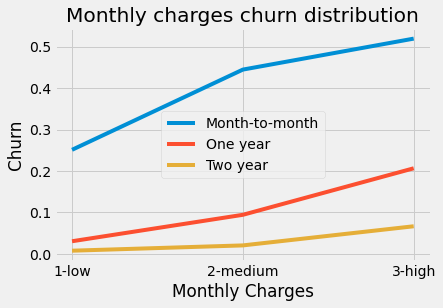

In [516]:
y1= churn1.groupby(churn.monthlycharges_cat.loc[churn.contract=='Month-to-month'])['churn'].mean()
y1
x1=y1.index
#x1=x1[[1,2,0]]
plt.plot(x1, y1, label = "Month-to-month")

y2= churn1.groupby(churn.monthlycharges_cat.loc[churn.contract=='One year'])['churn'].mean()
x2=y2.index
#x2=x2[[1,2,0]]
plt.plot(x2, y2, label = "One year")

y3= churn1.groupby(churn.monthlycharges_cat.loc[churn.contract=='Two year'])['churn'].mean()
x3=y3.index
#x3=x3[[1,2,0]]
plt.plot(x3, y3, label = "Two year")

plt.xlabel('Monthly Charges')

plt.ylabel('Churn')

plt.title('Monthly charges churn distribution')

plt.legend()

plt.show()

We can see that cutomers wh have long term contract, less churn

In [517]:
##Check distribution- paperlessbilling
churn1.groupby('paperlessbilling').agg({'churn':['count','sum','mean']})

churn                
                 count   sum      mean
paperlessbilling                      
0                 2872   469  0.163301
1                 4171  1400  0.335651

In [518]:
##Check distribution- paymentmethod
churn1.groupby('paymentmethod').agg({'churn':['count','sum','mean']})

churn                
                          count   sum      mean
paymentmethod                                  
Bank transfer (automatic)  1544   258  0.167098
Credit card (automatic)    1522   232  0.152431
Electronic check           2365  1071  0.452854
Mailed check               1612   308  0.191067

In [519]:
#Check distribution of payment method and monthlychargegroup
churn.groupby(['paymentmethod','monthlycharges_cat']).agg({'churn':['count','sum','mean']})

churn               
                                             count  sum      mean
paymentmethod             monthlycharges_cat                     
Bank transfer (automatic) 1-low                367   28  0.076294
                          2-medium             721  123  0.170596
                          3-high               456  107  0.234649
Credit card (automatic)   1-low                369   18  0.048780
                          2-medium             706  123  0.174221
                          3-high               447   91  0.203579
Electronic check          1-low                202   60  0.297030
                          2-medium            1289  616  0.477890
                          3-high               874  395  0.451945
Mailed check              1-low                821   92  0.112058
                          2-medium             673  181  0.268945
                          3-high               118   35  0.296610

We can see that customer who's payment method is "Electronic check" and  pay medium and high rates have the highest churn

paymentmethod
Bank transfer (automatic)     258
Credit card (automatic)       232
Electronic check             1071
Mailed check                  308
Name: churn, dtype: int32

Index(['Bank transfer (automatic)', 'Credit card (automatic)',
       'Electronic check', 'Mailed check'],
      dtype='object', name='paymentmethod')

([<matplotlib.patches.Wedge at 0x1d08a693460>,
 [Text(0.9981722716544583, 0.46222517899848176, 'Bank transfer (automatic)'),
  Text(0.3392152028260276, 1.0463904845571261, 'Credit card (automatic)'),
  Text(-1.0489263616398672, -0.33129063955528637, 'Electronic check'),
  Text(0.955847127752675, -0.544386139029055, 'Mailed check')])

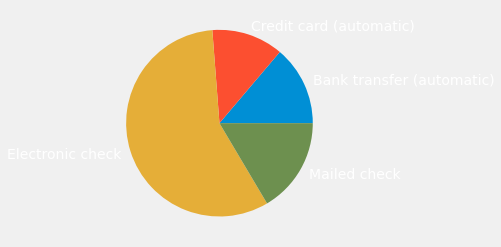

In [520]:
# pie graph for distribution of payment method
y=churn1.groupby('paymentmethod')['churn'].agg('sum')
y
l = y.index
l
plt.pie(y, labels = l, textprops=dict(color="w"))
plt.show()

C:\Users\dana\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dana\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dana\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 61.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


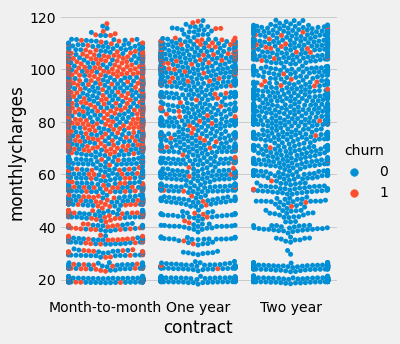

In [521]:
sns.catplot(data=churn1, kind="swarm", x="contract", y="monthlycharges", hue="churn")


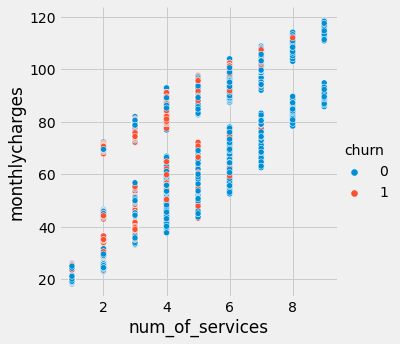

In [522]:
sns.relplot(data=churn1, x="num_of_services", y="monthlycharges", hue="churn")

In [523]:
#check distribution of total services
churn1.groupby('num_of_services').agg({'churn':['count','sum','mean']})

churn               
                count  sum      mean
num_of_services                     
1                1264  138  0.109177
2                 859  266  0.309662
3                 846  380  0.449173
4                 965  352  0.364767
5                 922  289  0.313449
6                 908  232  0.255507
7                 676  152  0.224852
8                 395   49  0.124051
9                 208   11  0.052885

Text(0.5, 0, 'Total services')

Text(0, 0.5, 'churn')

Text(0.5, 1.0, 'Total services and churn distribution')

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='num_of_services')


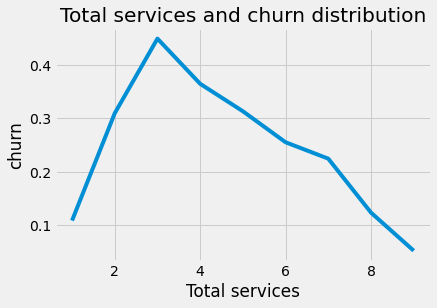

In [524]:
y=churn1.groupby('num_of_services')['churn'].agg('mean')
x=y.index
plt.xlabel('Total services')
plt.ylabel('churn')
plt.title("Total services and churn distribution")

print(x)
plt.plot(x,y)

It seems that customers who use between 2-4 services churn more

In [525]:
# convert all categoriacl vatiable to dummies
churn1 = pd.get_dummies(churn1)
churn1.head(10)
churn1.info()

,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,monthlycharges,churn,female,has_internetservice,num_of_services,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,monthlycharges_cat_1-low,monthlycharges_cat_2-medium,monthlycharges_cat_3-high
0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,0,1,1,2,1,0,0,1,0,0,0,0,1,0,1,0,0
1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,0,0,1,4,1,0,0,0,1,0,0,0,0,1,0,1,0
2,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,1,0,1,4,1,0,0,1,0,0,0,0,0,1,0,1,0
3,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,0,0,1,4,1,0,0,0,1,0,1,0,0,0,0,1,0
4,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,1,1,1,2,0,1,0,1,0,0,0,0,1,0,0,1,0
5,0,0,0,8,1,1,0,0,1,0,1,1,1,99.65,1,1,1,6,0,1,0,1,0,0,0,0,1,0,0,0,1
6,0,0,1,22,1,1,0,1,0,0,1,0,1,89.10,0,0,1,5,0,1,0,1,0,0,0,1,0,0,0,0,1
7,0,0,0,10,0,0,1,0,0,0,0,0,0,29.75,0,1,1,2,1,0,0,1,0,0,0,0,0,1,1,0,0
8,0,1,0,28,1,1,0,0,1,1,1,1,1,104.80,1,1,1,7,0,1,0,1,0,0,0,0,1,0,0,0,1
9,0,0,1,62,1,0,1,1,0,0,0,0,0,56.15,0,0,1,4,1,0,0,0,1,0,1,0,0,0,0,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   seniorcitizen                            7043 non-null   int64  
 1   partner                                  7043 non-null   int32  
 2   dependents                               7043 non-null   int32  
 3   tenure                                   7043 non-null   int64  
 4   phoneservice                             7043 non-null   int32  
 5   multiplelines                            7043 non-null   int64  
 6   onlinesecurity                           7043 non-null   int64  
 7   onlinebackup                             7043 non-null   int64  
 8   deviceprotection                         7043 non-null   int64  
 9   techsupport                              7043 non-null   int64  
 10  streamingtv                              7043 no

In [526]:
# drop column - has_internetservice- since the data is included in "internetservice_no"
# also drop num_of_services which is a function of services and "contract_One year" and "contract_Two year", "monthlychrges"
churn2=churn1.drop(['monthlycharges','has_internetservice','num_of_services','contract_One year','contract_Two year'], axis=1)
churn2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   seniorcitizen                            7043 non-null   int64
 1   partner                                  7043 non-null   int32
 2   dependents                               7043 non-null   int32
 3   tenure                                   7043 non-null   int64
 4   phoneservice                             7043 non-null   int32
 5   multiplelines                            7043 non-null   int64
 6   onlinesecurity                           7043 non-null   int64
 7   onlinebackup                             7043 non-null   int64
 8   deviceprotection                         7043 non-null   int64
 9   techsupport                              7043 non-null   int64
 10  streamingtv                              7043 non-null   int64
 11  stre

In [527]:
churn2=churn2.astype('float')
churn2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   seniorcitizen                            7043 non-null   float64
 1   partner                                  7043 non-null   float64
 2   dependents                               7043 non-null   float64
 3   tenure                                   7043 non-null   float64
 4   phoneservice                             7043 non-null   float64
 5   multiplelines                            7043 non-null   float64
 6   onlinesecurity                           7043 non-null   float64
 7   onlinebackup                             7043 non-null   float64
 8   deviceprotection                         7043 non-null   float64
 9   techsupport                              7043 non-null   float64
 10  streamingtv                              7043 no

In [528]:
#Let's see what correlations are in the data

churn2.corr()


,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,churn,female,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,monthlycharges_cat_1-low,monthlycharges_cat_2-medium,monthlycharges_cat_3-high
seniorcitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,0.156530,0.150889,0.001874,-0.108322,0.255338,-0.182742,0.138360,-0.016159,-0.024135,0.171718,-0.153477,-0.176395,0.004999,0.166545
partner,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,-0.014877,-0.150448,0.001808,-0.000851,0.000304,0.000615,-0.280865,0.110706,0.082029,-0.083852,-0.095125,-0.018809,-0.087574,0.117026
dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,-0.111377,-0.164221,-0.010517,0.052010,-0.165818,0.139812,-0.231720,0.052021,0.060267,-0.150642,0.059071,0.124611,-0.056021,-0.058515
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.006152,-0.352229,-0.005106,0.013274,0.019720,-0.039062,-0.645561,0.243510,0.233006,-0.208363,-0.233852,-0.089274,-0.176372,0.285852
phoneservice,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.016505,0.011942,0.006488,-0.452425,0.289999,0.172209,-0.000742,0.007556,-0.007721,0.003062,-0.003319,-0.069510,-0.116107,0.198662
multiplelines,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.163530,0.040102,0.008414,-0.199920,0.366083,-0.210564,-0.088203,0.075527,0.060048,0.083618,-0.227206,-0.265681,-0.141902,0.419205
onlinesecurity,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,-0.003636,-0.171226,0.017021,0.321269,-0.030696,-0.333403,-0.246679,0.095158,0.115721,-0.112338,-0.080798,-0.326590,0.161806,0.136480
onlinebackup,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.126735,-0.082255,0.013773,0.157884,0.165651,-0.381593,-0.164172,0.087004,0.090785,-0.000408,-0.174164,-0.384123,0.047945,0.320921
deviceprotection,0.059428,0.153786,0.013963,0.360653,-0.071227,0.201137,0.275438,0.303546,1.000000,0.333313,0.390874,0.402111,0.103797,-0.066160,0.002105,0.146291,0.176049,-0.380754,-0.225662,0.083115,0.111554,-0.003351,-0.187373,-0.396299,0.020080,0.364200
techsupport,-0.060625,0.119999,0.063268,0.324221,-0.096340,0.100571,0.354931,0.294233,0.333313,1.000000,0.278070,0.279358,0.037880,-0.164674,0.009212,0.313118,-0.020492,-0.336298,-0.285241,0.101252,0.117272,-0.114839,-0.085509,-0.334968,0.126134,0.184849


(7043, 26)

<AxesSubplot:>

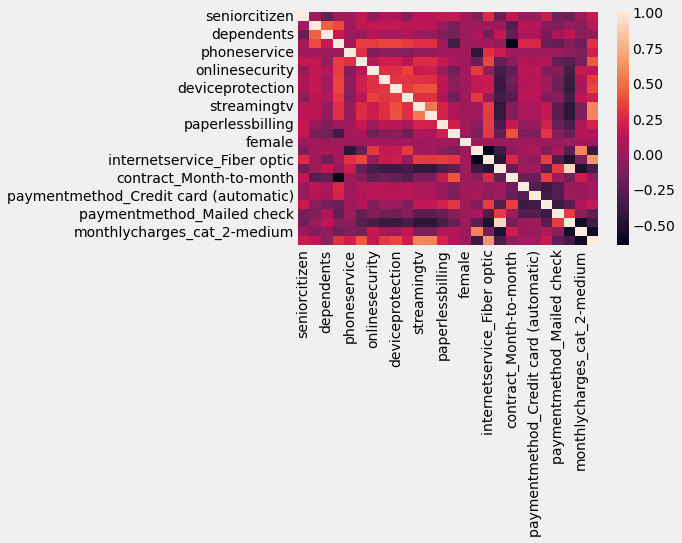

In [529]:
# Correlation matrix to heat map
churn2.shape
sns.heatmap(churn2.corr())


In [530]:

#corr_df data frame holds all features and their corresponding correlation coeffciant
ind_value=churn2.corr()['churn'].sort_values()
ind_value
corr_df = pd.DataFrame({'feature':ind_value.index.values, 'corr':ind_value})
corr_df.drop(['churn'], axis=0,inplace=True)
corr_df
corr_df.to_csv('correlations.csv', index=False) # saving results to csv

tenure                                    -0.352229
internetservice_No                        -0.227890
monthlycharges_cat_1-low                  -0.199679
onlinesecurity                            -0.171226
techsupport                               -0.164674
dependents                                -0.164221
partner                                   -0.150448
paymentmethod_Credit card (automatic)     -0.134302
internetservice_DSL                       -0.124214
paymentmethod_Bank transfer (automatic)   -0.117937
paymentmethod_Mailed check                -0.091683
onlinebackup                              -0.082255
deviceprotection                          -0.066160
female                                     0.008612
phoneservice                               0.011942
multiplelines                              0.040102
streamingmovies                            0.061382
streamingtv                                0.063228
monthlycharges_cat_3-high                  0.090731
monthlycharg

,feature,corr
tenure,tenure,-0.352229
internetservice_No,internetservice_No,-0.227890
monthlycharges_cat_1-low,monthlycharges_cat_1-low,-0.199679
onlinesecurity,onlinesecurity,-0.171226
techsupport,techsupport,-0.164674
dependents,dependents,-0.164221
partner,partner,-0.150448
paymentmethod_Credit card (automatic),paymentmethod_Credit card (automatic),-0.134302
internetservice_DSL,internetservice_DSL,-0.124214
paymentmethod_Bank transfer (automatic),paymentmethod_Bank transfer (automatic),-0.117937


<AxesSubplot:>

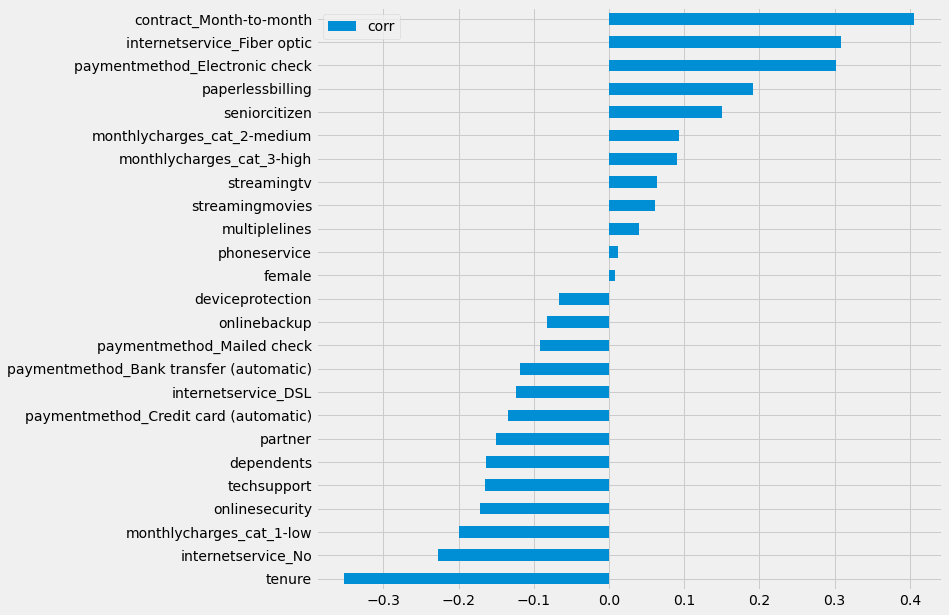

In [531]:

corr_df.plot(kind='barh',figsize=(10,10))

# Train Test

In [532]:
from sklearn.model_selection import train_test_split
test_size = 0.20
train, test = train_test_split(churn2, test_size=test_size, random_state=42, shuffle=True)

label = 'churn'


x_train = train.drop(label, axis=1)
y_train = train[label]
x_test = test.drop(label, axis=1)
y_test = test[label]

print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:',  y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)
x_train
y_train
x_test
y_test


Training Features Shape: (5634, 25)
Training Labels Shape: (5634,)
Testing Features Shape: (1409, 25)
Testing Labels Shape: (1409,)


,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,female,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,monthlycharges_cat_1-low,monthlycharges_cat_2-medium,monthlycharges_cat_3-high
2142,0.0,0.0,1.0,21.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1623,0.0,0.0,0.0,54.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6074,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1362,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6754,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5191,0.0,1.0,1.0,23.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5226,0.0,1.0,1.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5390,1.0,0.0,0.0,12.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


2142    0.0
1623    0.0
6074    1.0
1362    1.0
6754    0.0
       ... 
3772    1.0
5191    0.0
5226    0.0
5390    1.0
860     0.0
Name: churn, Length: 5634, dtype: float64

,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,female,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,monthlycharges_cat_1-low,monthlycharges_cat_2-medium,monthlycharges_cat_3-high
185,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2715,0.0,0.0,0.0,41.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3825,0.0,1.0,1.0,52.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1807,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
132,0.0,0.0,0.0,67.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,0.0,1.0,0.0,64.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
315,0.0,1.0,1.0,51.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2439,0.0,1.0,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5002,0.0,1.0,1.0,69.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


185     1.0
2715    0.0
3825    0.0
1807    1.0
132     0.0
       ... 
6366    0.0
315     0.0
2439    0.0
5002    0.0
1161    1.0
Name: churn, Length: 1409, dtype: float64

# Decision Tree

In [533]:
from sklearn.tree import DecisionTreeClassifier # Importing the algorithm
from sklearn.metrics import accuracy_score # importing "accuracy_score" from "sklearn.metrics"
cols = ['maxdepth', 'accuracy']
N = [None,3,4,5,6,10]
dat = pd.DataFrame(columns = cols)
# get optimum max depth
for i in N:
    clf=DecisionTreeClassifier(max_depth=i)
    clf.fit(x_train, y_train) # running\training the algorithm with the train data
    y_test_pred_DT = clf.predict(x_test) # making a prediction based on "test" data features
    test_acc = accuracy_score(y_test, y_test_pred_DT)
    dat = dat.append({'maxdepth': i, 'accuracy':test_acc},ignore_index=True)
    
dat

DecisionTreeClassifier()

DecisionTreeClassifier(max_depth=3)

DecisionTreeClassifier(max_depth=4)

DecisionTreeClassifier(max_depth=5)

DecisionTreeClassifier(max_depth=6)

DecisionTreeClassifier(max_depth=10)

,maxdepth,accuracy
0,NaN,0.738822
1,3.0,0.795600
2,4.0,0.797729
3,5.0,0.802697
4,6.0,0.798439
5,10.0,0.753016


[0, 1, 2, 3, 4, 5]

<BarContainer object of 6 artists>

([<matplotlib.axis.XTick at 0x1d089b367c0>,
 [Text(0, 0, 'nan'),
  Text(1, 0, '3.0'),
  Text(2, 0, '4.0'),
  Text(3, 0, '5.0'),
  Text(4, 0, '6.0'),
  Text(5, 0, '10.0')])

(0.73, 0.82)

Text(0.5, 0, 'max depth')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Classification Tree Accuracy Comparison')

Text(0, 10, '0.7388')

Text(0, 10, '0.7956')

Text(0, 10, '0.7977')

Text(0, 10, '0.8027')

Text(0, 10, '0.7984')

Text(0, 10, '0.7530')

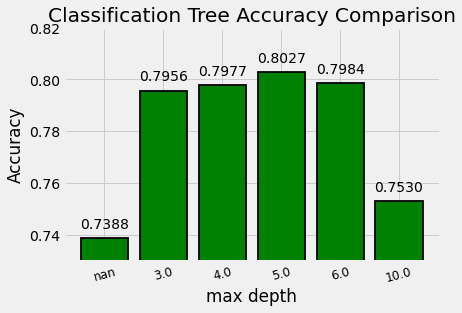

In [534]:
import matplotlib.pyplot as plt

%matplotlib inline
xvalues = list(range(len(dat)))
xvalues
plt.style.use('fivethirtyeight')
plt.bar(xvalues, dat['accuracy'], color = 'g', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, dat['maxdepth'], rotation = 15, fontsize = 12)
plt.ylim(ymin = 0.73, ymax = 0.82)
plt.xlabel('max depth'); plt.ylabel('Accuracy'); plt.title('Classification Tree Accuracy Comparison');
#add data lables
# zip joins x and y coordinates in pairs
for x,y in zip(xvalues, dat['accuracy']):

    label = "{:.4f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

DecisionTreeClassifier(max_depth=5)

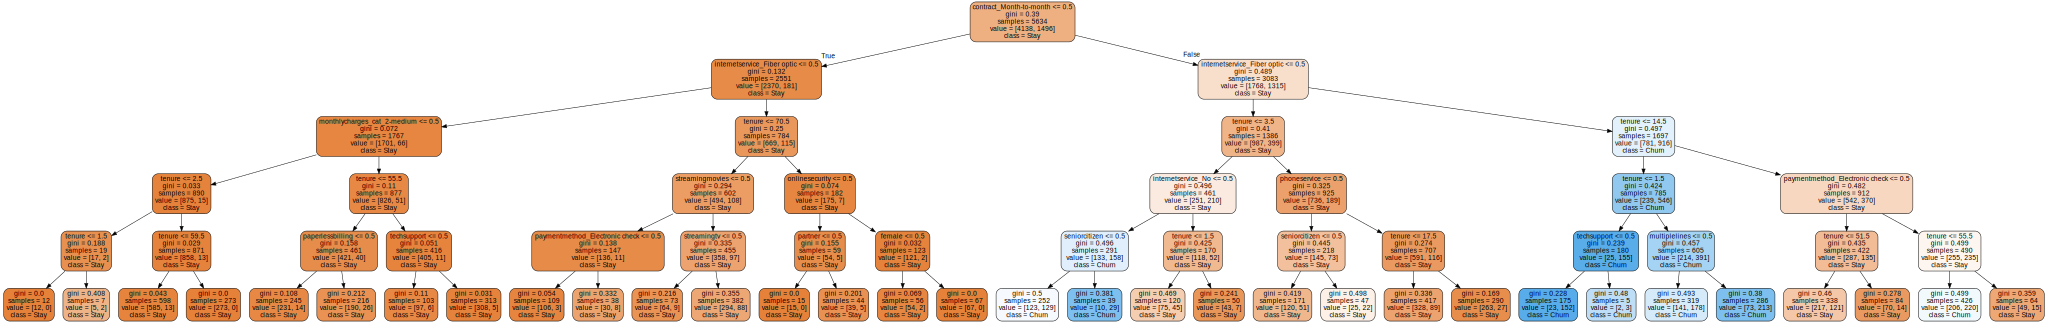

'decision_tree_graphivz.png'

'decision_tree_graphivz.png'

In [535]:
import graphviz
#using our maximum accuracy - max depth5
from sklearn.tree import DecisionTreeClassifier # Importing the algorithm
clf = DecisionTreeClassifier(max_depth=5)

clf.fit(x_train, y_train) # running\training the algorithm with the train data

y_test_pred_DecisionTree = clf.predict(x_test) # making a prediction based on "test" data features
# Plotting the decision tree
# Importing the necessary libraries
from sklearn.tree import export_graphviz


dot_data = export_graphviz(clf,
                                feature_names=x_train.columns,
                                class_names=['Stay', 'Churn'],
                                out_file=None,
                                filled=True,
                                rounded=True)

graph = graphviz.Source(dot_data, format="png") 
graph
graph.render("decision_tree_graphivz")
'decision_tree_graphivz.png'

# Random forest

In [536]:
# Pandas is used for data manipulation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score # importing "accuracy_score" from "sklearn.metrics"
from sklearn.ensemble import RandomForestClassifier


In [537]:
#dirst random forest with default hyper parameters
model = RandomForestClassifier(random_state=0)
model.fit(x_train, y_train) # running\training the algorithm with the train data
y_test_rf_auto = model.predict(x_test)
test_acc_rf_auto = accuracy_score(y_test, y_test_rf_auto)
test_acc_rf_auto
model.get_params()  


RandomForestClassifier(random_state=0)

0.78708303761533

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

array([0.0314787 , 0.03755238, 0.03019683, 0.31558339, 0.00998018,
       0.03440725, 0.03320394, 0.03533544, 0.03078111, 0.03213673,
       0.02648639, 0.02853568, 0.03869659, 0.04506236, 0.0126138 ,
       0.04073945, 0.01767683, 0.08804661, 0.0148787 , 0.01593353,
       0.03638443, 0.01462419, 0.01011607, 0.01078934, 0.0087601 ])

(25,)

,feature,importance
3,tenure,0.315583
17,contract_Month-to-month,0.088047
13,female,0.045062
15,internetservice_Fiber optic,0.040739
12,paperlessbilling,0.038697
1,partner,0.037552
20,paymentmethod_Electronic check,0.036384
7,onlinebackup,0.035335
5,multiplelines,0.034407
6,onlinesecurity,0.033204


<AxesSubplot:ylabel='feature'>

Text(0.5, 1.0, 'Feature Importance of Random Forest')

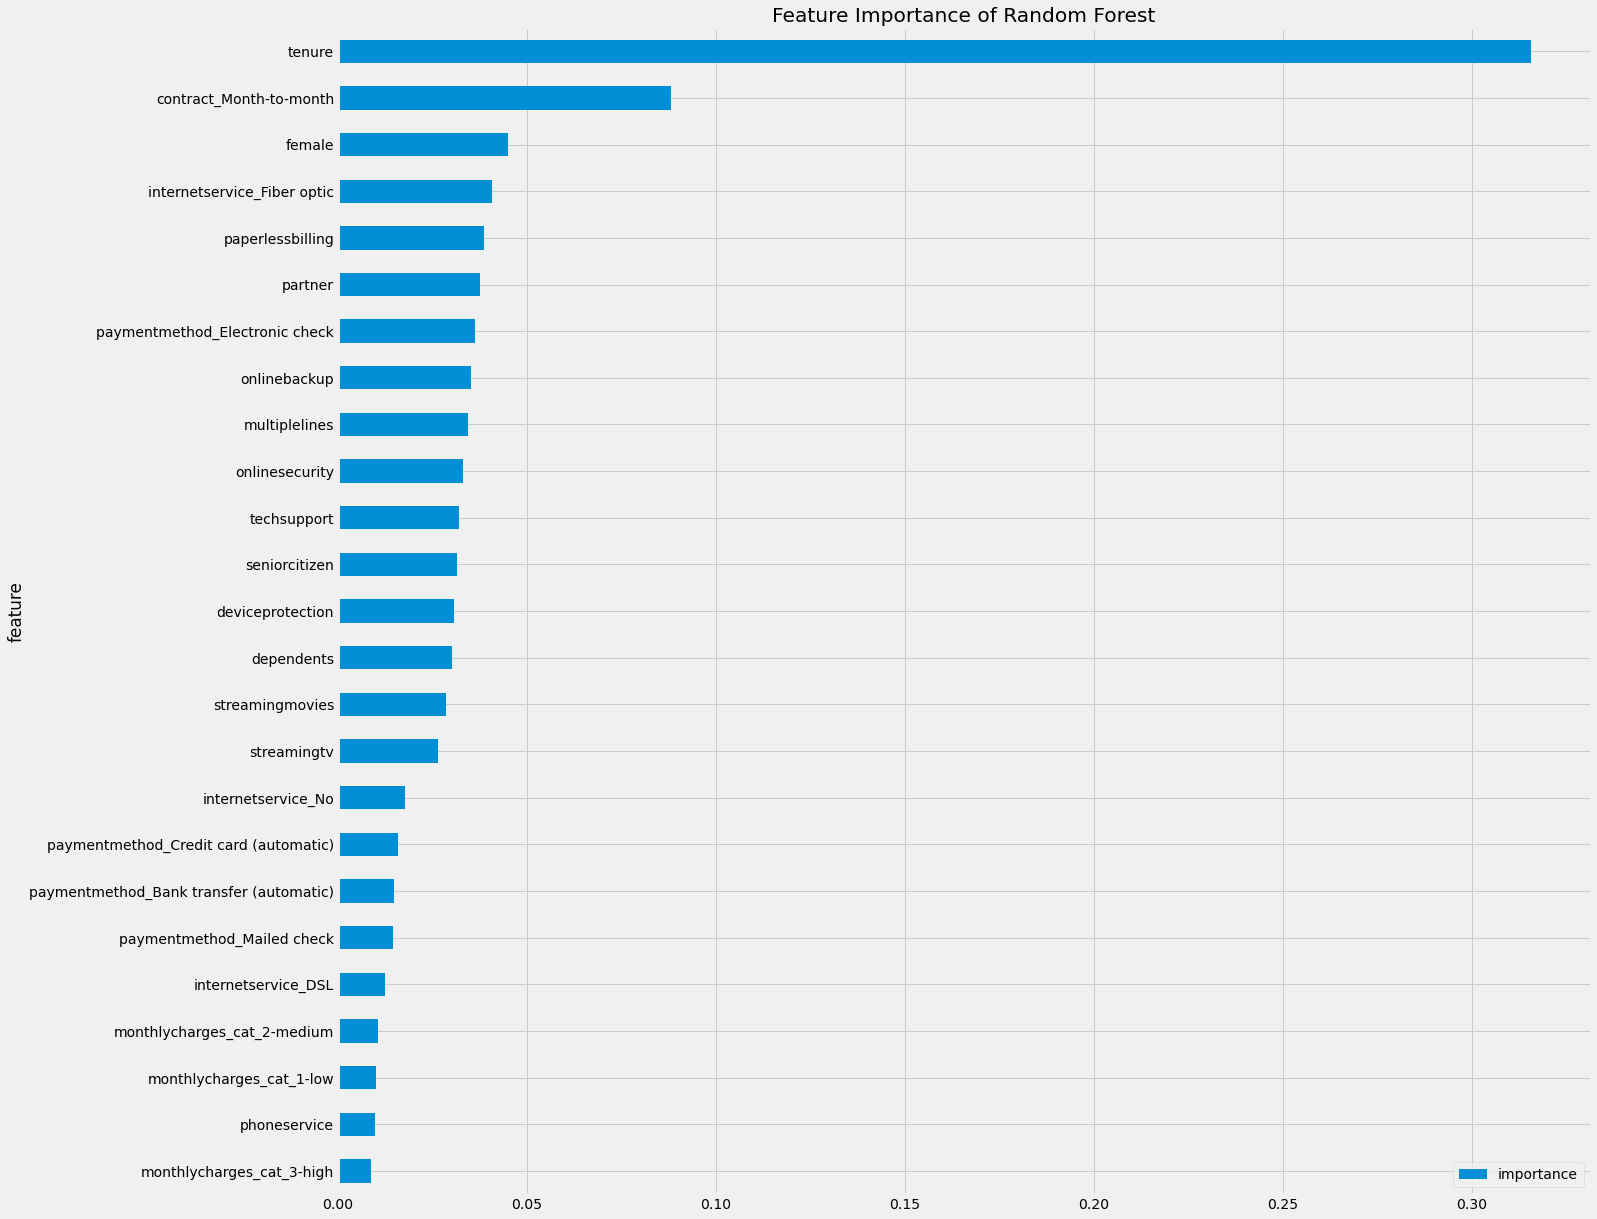

In [538]:
# applying the method "feature_importances_" on the algorithm
feature_importances = model.feature_importances_ 
feature_importances # Every feature importance (%)
features = x_train.columns # all the features
features.shape
stats = pd.DataFrame({'feature':features, 'importance':feature_importances}) # creating the data frame
stats.sort_values('importance', ascending=False) # Sorting the data frame
stats_sort=stats.sort_values('importance', ascending=True)
stats_sort.plot(y='importance', x='feature', kind='barh',figsize=(20,20))
plt.title('Feature Importance of Random Forest');
plt.show()


In [539]:
# the follwing procedure tunes hyper parameters of random forest according to the param grid 

from sklearn.model_selection import GridSearchCV

# Create the parameter grid 
param_grid = {
    'bootstrap': [True],
    'max_depth': [3, 4, 5, 6,7,8,10,None],
    'max_features': [2,3,5,9,10,11,12,'auto'],
    'n_estimators': [100, 200, 300, 500,1000]
}

# Create a base model
rf = RandomForestClassifier(random_state = 0)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)
# Fit the grid search to the data
grid_search.fit(x_train, y_train);


Fitting 3 folds for each of 320 candidates, totalling 960 fits


In [540]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 7, 'max_features': 9, 'n_estimators': 100}

In [541]:
best_grid = grid_search.best_estimator_
best_grid.fit(x_train, y_train);
y_test_rf_best_grid = best_grid.predict(x_test)
y_test_rf_best_grid
test_acc_rf_grid = accuracy_score(y_test, y_test_rf_best_grid)
test_acc_rf_grid


RandomForestClassifier(max_depth=7, max_features=9, random_state=0)

array([1., 0., 0., ..., 0., 0., 1.])

0.8119233498935415

,model,accuracy
0,auto,0.787083
1,Best grid,0.811923


[0, 1]

<BarContainer object of 2 artists>

([<matplotlib.axis.XTick at 0x1d0876aa040>,
 [Text(0, 0, 'auto'), Text(1, 0, 'Best grid')])

(0.77, 0.82)

Text(0.5, 0, 'model')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'RF Accuracy Comparison')

Text(0, 10, '0.7871')

Text(0, 10, '0.8119')

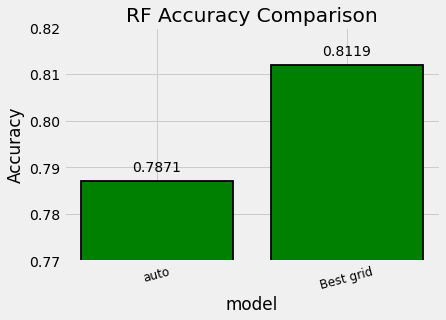

In [542]:
rf_acc_df = pd.DataFrame({'model':["auto","Best grid",],\
                          'accuracy':[test_acc_rf_auto,test_acc_rf_grid]})
rf_acc_df
import matplotlib.pyplot as plt

%matplotlib inline
xvalues = list(range(len(rf_acc_df)))
xvalues
plt.style.use('fivethirtyeight')
plt.bar(xvalues, rf_acc_df['accuracy'], color = 'g', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, rf_acc_df['model'], rotation = 15, fontsize = 12)
plt.ylim(ymin = 0.77, ymax = 0.82)
plt.xlabel('model'); plt.ylabel('Accuracy'); plt.title('RF Accuracy Comparison');
#add data lables
# zip joins x and y coordinates in pairs
for x,y in zip(xvalues, rf_acc_df['accuracy']):

    label = "{:.4f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

# KNN

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=10)

KNeighborsClassifier(n_neighbors=11)

KNeighborsClassifier(n_neighbors=15)

KNeighborsClassifier(n_neighbors=100)

,n_neighbors,accuracy
0,2.0,0.757984
1,3.0,0.758694
2,4.0,0.775018
3,5.0,0.767211
4,6.0,0.779276
5,7.0,0.770759
6,8.0,0.789922
7,9.0,0.784954
8,10.0,0.798439
9,11.0,0.801987


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

<Figure size 1080x288 with 0 Axes>

<BarContainer object of 12 artists>

([<matplotlib.axis.XTick at 0x1d08a1766d0>,
 [Text(0, 0, '2.0'),
  Text(1, 0, '3.0'),
  Text(2, 0, '4.0'),
  Text(3, 0, '5.0'),
  Text(4, 0, '6.0'),
  Text(5, 0, '7.0'),
  Text(6, 0, '8.0'),
  Text(7, 0, '9.0'),
  Text(8, 0, '10.0'),
  Text(9, 0, '11.0'),
  Text(10, 0, '15.0'),
  Text(11, 0, '100.0')])

(0.74, 0.82)

Text(0.5, 0, 'N neighbors')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'KNN Accuracy Comparison')

Text(0, 10, '0.758')

Text(0, 10, '0.759')

Text(0, 10, '0.775')

Text(0, 10, '0.767')

Text(0, 10, '0.779')

Text(0, 10, '0.771')

Text(0, 10, '0.790')

Text(0, 10, '0.785')

Text(0, 10, '0.798')

Text(0, 10, '0.802')

Text(0, 10, '0.796')

Text(0, 10, '0.796')

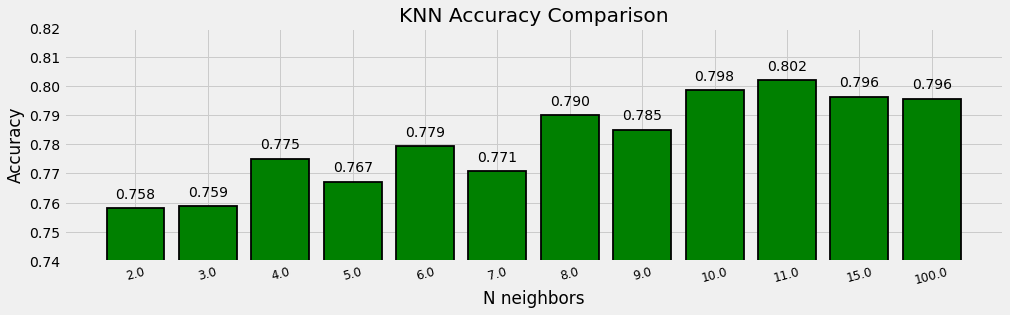

In [543]:
from sklearn.neighbors import KNeighborsClassifier  # Importing the algorithm
cols = ['n_neighbors', 'accuracy']
N = [2,3,4,5,6,7,8,9,10, 11,15,100]
dat = pd.DataFrame(columns = cols)
for i in N:
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train, y_train) # running\training the algorithm with the train data
    y_test_pred_Knn = clf.predict(x_test) # making a prediction based on "test" data features
    test_acc = accuracy_score(y_test, y_test_pred_Knn)
    dat = dat.append({'n_neighbors': i, 'accuracy':test_acc},ignore_index=True)
    
dat
xvalues = list(range(len(dat)))
xvalues
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,4))
plt.bar(xvalues, dat['accuracy'], color = 'g', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, dat['n_neighbors'], rotation = 15, fontsize = 12)
plt.ylim(ymin = 0.74, ymax = 0.82)
plt.xlabel('N neighbors'); plt.ylabel('Accuracy'); plt.title('KNN Accuracy Comparison');
#add data lables
# zip joins x and y coordinates in pairs
for x,y in zip(xvalues, dat['accuracy']):

    label = "{:.3f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

In [544]:
# scales KNN
from sklearn.preprocessing import StandardScaler # import the libraries

scaler = StandardScaler() # define

x_train_scaled = scaler.fit_transform(x_train) # Fit to data, then transform it.
x_test_scaled = scaler.transform(x_test) # Perform standardization by centering and scaling

clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(x_train_scaled, y_train)

y_test_pred_Knn_Scaled = clf.predict(x_test_scaled)

test_acc = accuracy_score(y_test, y_test_pred_Knn_Scaled)
test_acc


KNeighborsClassifier(n_neighbors=10)

0.7821149751596878

scaling did not improve the KNN prediction 

# Evaluation + Benchmark

In [545]:
y_train.value_counts()
y_train.value_counts(normalize=True)
import numpy as np

def get_benchmark_predictions(x, benchmark_value): # The function returns a numpy array on the same length as x with all values equal to benchmark_value
    return np.ones(len(x))*benchmark_value
    

benchmark_value = 0

y_test_pred_Benchmark = get_benchmark_predictions(x_test, benchmark_value)
y_test_pred_Benchmark
# Basicly, our benchmark predicts, always 0 (zero) --> Not churn

0.0    4138
1.0    1496
Name: churn, dtype: int64

0.0    0.734469
1.0    0.265531
Name: churn, dtype: float64

array([0., 0., 0., ..., 0., 0., 0.])

In [546]:
test_acc = accuracy_score(y_test, y_test_pred_Benchmark)
test_acc

0.7352732434350603

# Our model results:
Decision tree best accuracy Result: 80.3%<br> 
Random Forest best accuracy Result: 81.2% <br>
Knn best accuracy Result (before standardization): 80.2% <br>
Knn best accuracy Result (after standardization): 78.2% <br>

# The performance on test is 73.9%, we can see, that any of our algorithms beat the benchmark performance

,model,accuracy
0,Decision Tree,0.803
1,Random Forest,0.812
2,KNN,0.802
3,Benchmark,0.739


[0, 1, 2, 3]

<BarContainer object of 4 artists>

([<matplotlib.axis.XTick at 0x1d08a1ecd30>,
 [Text(0, 0, 'Decision Tree'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'KNN'),
  Text(3, 0, 'Benchmark')])

(0.72, 0.83)

Text(0.5, 0, 'model')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'best prediction model')

Text(0, 10, '0.803')

Text(0, 10, '0.812')

Text(0, 10, '0.802')

Text(0, 10, '0.739')

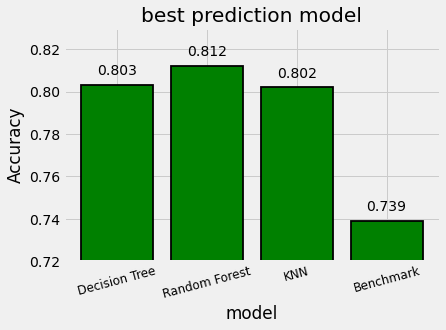

In [547]:
# best prediction model

final = pd.DataFrame({'model':["Decision Tree","Random Forest","KNN","Benchmark"],'accuracy':[0.803,0.812,0.802,0.739]})
final
xvalues = list(range(len(final)))
xvalues
plt.style.use('fivethirtyeight')
plt.bar(xvalues, final['accuracy'], color = 'g', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, final['model'], rotation = 15, fontsize = 12)
plt.ylim(ymin = 0.72, ymax = 0.83)
plt.xlabel('model'); plt.ylabel('Accuracy'); plt.title('best prediction model');
#add data lables
# zip joins x and y coordinates in pairs
for x,y in zip(xvalues, final['accuracy']):

    label = "{:.3f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()